In [1]:
from nsepy import get_history
from datetime import date
import pandas as pd

In [2]:
df = pd.read_excel("MCAP_31032020_TOP1000.xlsx")
stock_1000 = list(df.Symbol)

In [47]:
# stock_1000

In [4]:
stock = stock_1000[:500]

In [5]:
the_stock_data = {}

for symbols in stock:
    try:
        the_stock_data[symbols] = get_history(symbol = symbols , start = date(2019, 1, 1), end = date(2022, 1,31))
    except:
        continue

In [6]:
data = pd.concat(the_stock_data)
# data.head()

In [7]:
data = data.reset_index()

In [8]:
# data.head()

In [9]:
data.columns

Index(['level_0', 'Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High',
       'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades',
       'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [10]:
data = data.pivot(index='Date', columns='Symbol', values = 'Close')
data.head()

Symbol,3MINDIA,AARTIDRUGS,AARTIIND,AAVAS,ABB,ABCAPITAL,ABFRL,ACC,ACCELYA,ADANIENT,...,VTL,WELCORP,WELSPUNIND,WHIRLPOOL,WIPRO,WOCKPHARMA,YESBANK,ZEEL,ZENSARTECH,ZYDUSWELL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,20666.35,575.65,1448.6,845.25,1319.2,100.1,199.55,1488.8,950.0,157.25,...,1104.85,139.85,60.5,1404.6,326.65,528.75,184.25,480.25,232.5,1366.5
2019-01-02,19985.75,575.1,1450.7,840.65,1319.25,99.25,195.55,1483.95,949.4,154.85,...,1108.1,135.5,61.35,1396.85,325.55,517.75,184.65,470.25,231.25,1350.7
2019-01-03,19990.25,575.2,1429.15,837.65,1308.95,98.25,197.75,1452.25,948.25,152.5,...,1107.7,132.8,61.2,1390.7,325.5,507.8,184.1,461.45,231.1,1359.75
2019-01-04,20357.4,572.4,1463.35,840.85,1303.65,98.0,198.45,1469.1,944.15,152.55,...,1096.75,133.75,60.85,1390.75,324.45,510.7,189.65,463.95,229.25,1339.3
2019-01-07,20388.25,580.1,1471.8,840.65,1301.8,97.6,207.15,1477.95,947.9,151.25,...,1096.2,137.85,61.3,1428.6,324.25,506.7,187.15,462.95,228.8,1334.75


In [48]:
# list(data.columns)

In [49]:
# pd.set_option('precision', 3)
# data.describe().T.head(10)

In [14]:
data.isnull().values.any()

True

<AxesSubplot:>

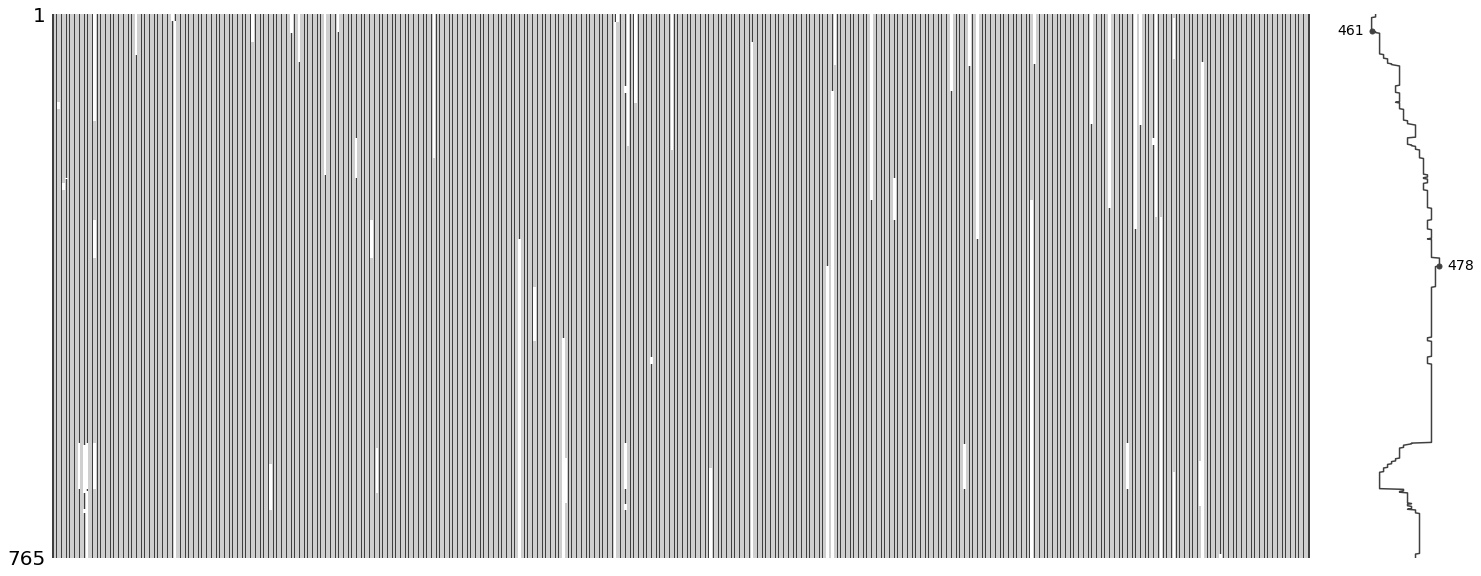

In [15]:
import missingno
missingno.matrix(data)

In [16]:
print('Data Shape before cleaning =', data.shape)

missing_percentage = data.isnull().mean().sort_values(ascending=False)
#print(missing_percentage.head(10))
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
data.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data.shape)

Data Shape before cleaning = (765, 486)
Data Shape after cleaning = (765, 462)


In [17]:
data = data.fillna(method='ffill')

In [18]:
data.isnull().sum().sum()

686

In [19]:
data = data.fillna(method='bfill')

In [20]:
data.isnull().sum().sum()

0

In [21]:
data.head()

Symbol,3MINDIA,AARTIDRUGS,AARTIIND,AAVAS,ABB,ABCAPITAL,ABFRL,ACC,ACCELYA,ADANIENT,...,VTL,WELCORP,WELSPUNIND,WHIRLPOOL,WIPRO,WOCKPHARMA,YESBANK,ZEEL,ZENSARTECH,ZYDUSWELL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,20666.35,575.65,1448.60,845.25,1319.20,100.10,199.55,1488.80,950.00,157.25,...,1104.85,139.85,60.50,1404.60,326.65,528.75,184.25,480.25,232.50,1366.50
2019-01-02,19985.75,575.10,1450.70,840.65,1319.25,99.25,195.55,1483.95,949.40,154.85,...,1108.10,135.50,61.35,1396.85,325.55,517.75,184.65,470.25,231.25,1350.70
2019-01-03,19990.25,575.20,1429.15,837.65,1308.95,98.25,197.75,1452.25,948.25,152.50,...,1107.70,132.80,61.20,1390.70,325.50,507.80,184.10,461.45,231.10,1359.75
2019-01-04,20357.40,572.40,1463.35,840.85,1303.65,98.00,198.45,1469.10,944.15,152.55,...,1096.75,133.75,60.85,1390.75,324.45,510.70,189.65,463.95,229.25,1339.30
2019-01-07,20388.25,580.10,1471.80,840.65,1301.80,97.60,207.15,1477.95,947.90,151.25,...,1096.20,137.85,61.30,1428.60,324.25,506.70,187.15,462.95,228.80,1334.75


In [22]:
data.to_csv('NSE500_stock_data.csv')

In [23]:
import numpy as np

#Calculate returns and create a data frame
returns = data.pct_change().mean()*266
returns = pd.DataFrame(returns)
returns.columns = ['returns']

#Calculate the volatility
returns['volatility'] = data.pct_change().std()*np.sqrt(266)

data = returns

data.head()

,returns,volatility
Symbol,,
3MINDIA,0.119732,0.328209
AARTIDRUGS,0.269366,0.638790
AARTIIND,0.067868,0.556175
AAVAS,0.519207,0.428895
ABB,0.252227,0.343126


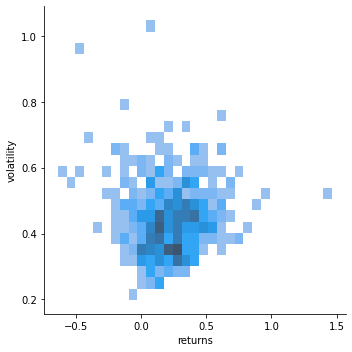

In [24]:
import seaborn as sns
sns.displot(data, x="returns", y="volatility")

In [25]:
from sklearn.preprocessing import StandardScaler

#Prepare the scaler
scale = StandardScaler().fit(data)

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data
X.head()
# X.columns

,returns,volatility
Symbol,,
3MINDIA,-0.457762,-1.091609
AARTIDRUGS,0.208263,1.861134
AARTIIND,-0.688609,1.075697
AAVAS,1.320311,-0.134374
ABB,0.131976,-0.949790


In [51]:
X.to_csv('sym_returns_volatility.csv')

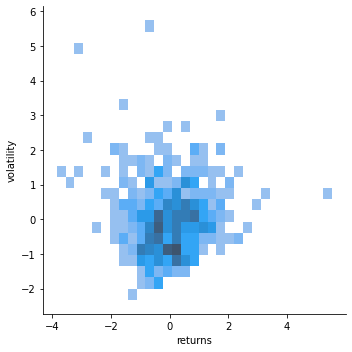

In [26]:
sns.displot(X, x="returns", y="volatility")

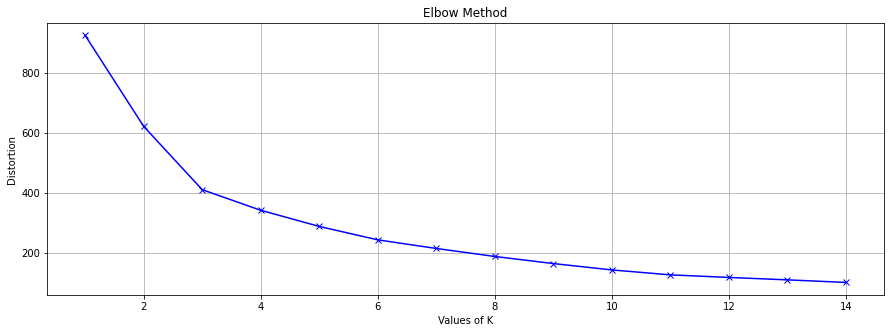

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [28]:
from kneed import KneeLocator
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

4

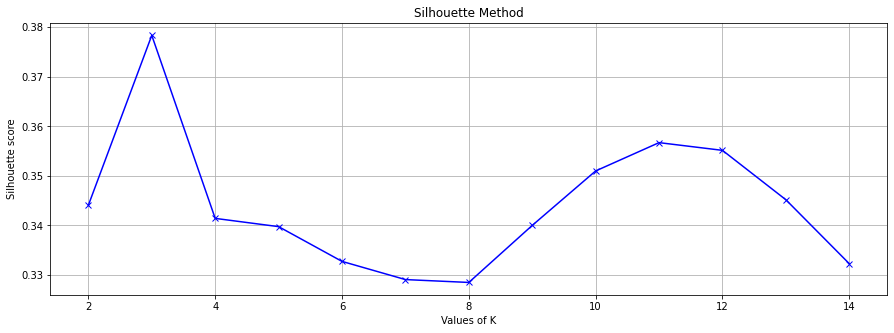

Suggested number of clusters:  2


In [29]:
from sklearn.metrics import silhouette_score

#For the silhouette method k needs to start from 2
K = range(2,15)
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)

In [50]:
X

,returns,volatility
Symbol,,
3MINDIA,-0.457762,-1.091609
AARTIDRUGS,0.208263,1.861134
AARTIIND,-0.688609,1.075697
AAVAS,1.320311,-0.134374
ABB,0.131976,-0.949790
...,...,...
WOCKPHARMA,-0.798853,0.957601
YESBANK,-2.937329,5.028157
ZEEL,-0.729004,2.397734


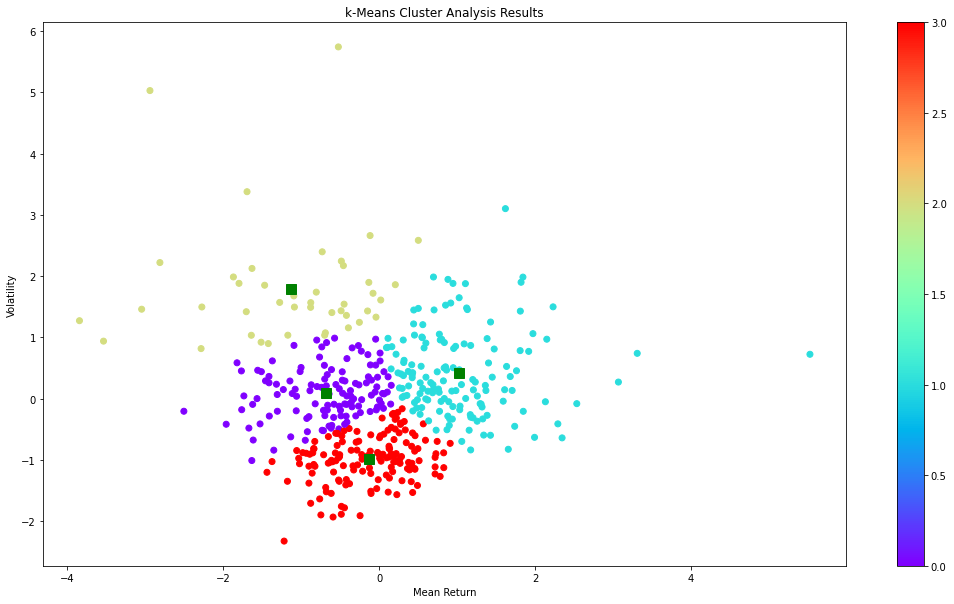

In [30]:
c = 4
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_ 
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

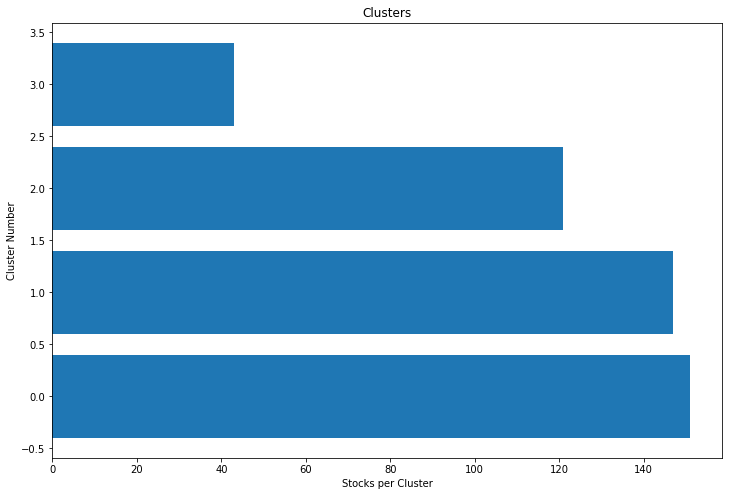

In [31]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()

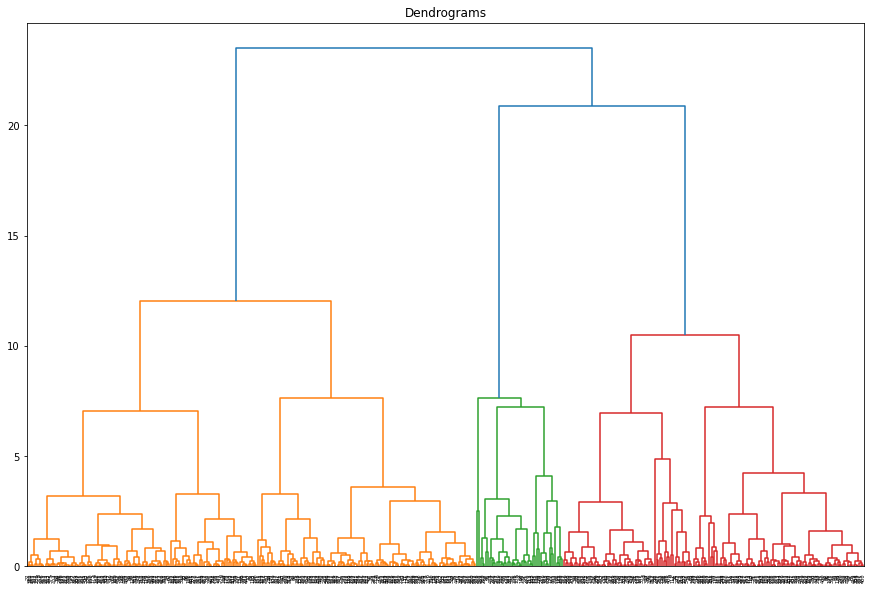

In [32]:
#x-axis is represented by stock , y-axis represents the distance between them
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

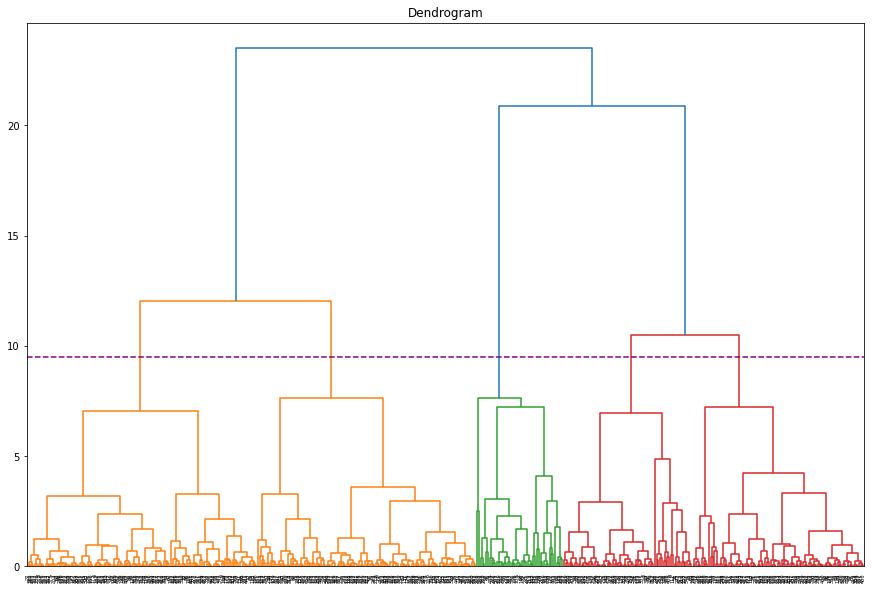

In [33]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=9.5, color='purple', linestyle='--')

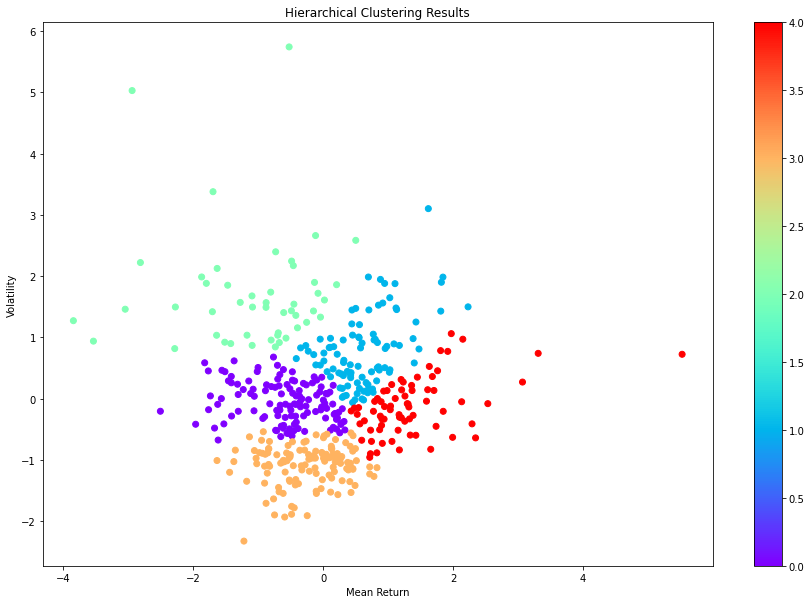

In [34]:
#Fit the model
clusters = 5
hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

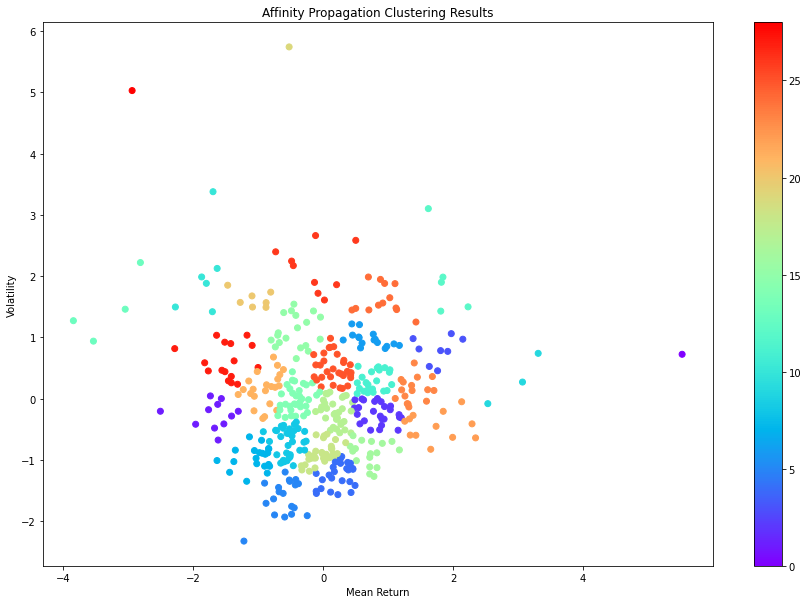

In [35]:
from sklearn.cluster import AffinityPropagation

#Fit the model
ap = AffinityPropagation()
ap.fit(X)
labels1 = ap.predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels1, cmap='rainbow')
ax.set_title('Affinity Propagation Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

The number of clusters is: 29


<Figure size 432x288 with 0 Axes>

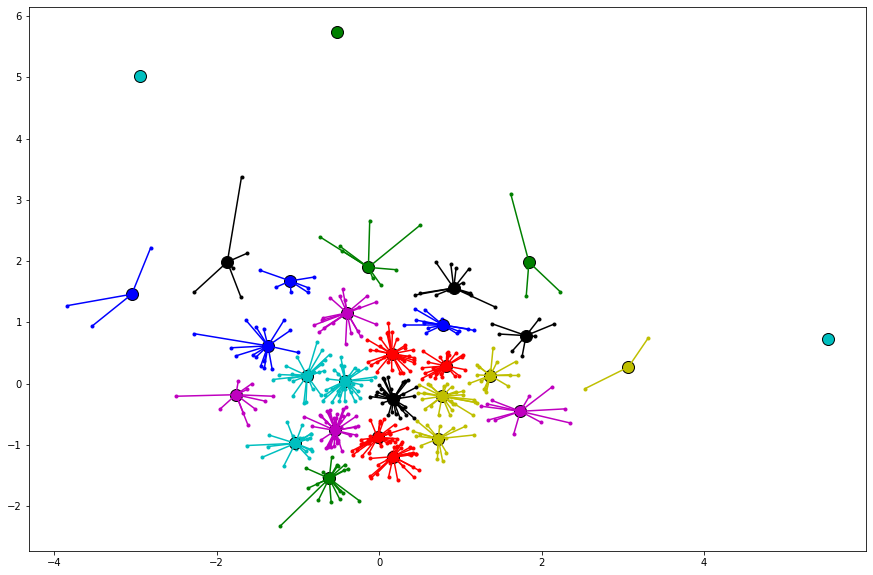

In [36]:
from itertools import cycle

#Extract the cluster centers and labels
cci = ap.cluster_centers_indices_
labels2 = ap.labels_

#Print their number
clusters = len(cci)
print('The number of clusters is:',clusters)

#Plot the results
X_ap = np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf
fig=plt.figure(figsize=(15,10))
colors = cycle('cmykrgbcmykrgbcmykrgbcmykrgb')
for k, col in zip(range(clusters),colors):
    cluster_members = labels2 == k
    cluster_center = X_ap[cci[k]]
    plt.plot(X_ap[cluster_members, 0], X_ap[cluster_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for x in X_ap[cluster_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [37]:
print("k-Means Clustering", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("Hierarchical Clustering", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("Affinity Propagation Clustering", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

k-Means Clustering 0.3391126450778838
Hierarchical Clustering 0.3010791916005389
Affinity Propagation Clustering 0.3203865320245486


In [38]:
cluster_size_limit = 1000
counts = clustered_series.value_counts()
symbol_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(symbol_count))
print ("Number of Pairs: %d" % (symbol_count*(symbol_count-1)).sum())

Number of clusters: 4
Number of Pairs: 60438


In [40]:
data1 = pd.read_csv("NSE500_stock_data.csv")

In [41]:
data1.isnull().values.any()

False

In [42]:
def find_cointegrated_pairs(data, significance=0.05):
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [43]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}

for i, clust in enumerate(symbol_count.index):
    symbols = clustered_series[clustered_series == clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(data1[symbols])
    cluster_dict[clust] = {}
    cluster_dict[clust]['score_matrix'] = score_matrix
    cluster_dict[clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[clust]['pairs'] = pairs
    
pairs = []   
for cluster in cluster_dict.keys():
    pairs.extend(cluster_dict[cluster]['pairs'])
    
print ("Number of pairs:", len(pairs))
print ("In those pairs, we found %d unique symbols." % len(np.unique(pairs)))
print(pairs)

Number of pairs: 49
In those pairs, we found 53 unique symbols.
[('3MINDIA', 'ADANIPORTS'), ('3MINDIA', 'BLUEDART'), ('3MINDIA', 'BLUESTARCO'), ('3MINDIA', 'CERA'), ('3MINDIA', 'CHOLAHLDNG'), ('3MINDIA', 'CUMMINSIND'), ('3MINDIA', 'DALBHARAT'), ('3MINDIA', 'EMAMILTD'), ('3MINDIA', 'ENDURANCE'), ('3MINDIA', 'ERIS'), ('3MINDIA', 'GODREJIND'), ('3MINDIA', 'GRASIM'), ('3MINDIA', 'HDFC'), ('3MINDIA', 'HINDZINC'), ('3MINDIA', 'ICRA'), ('3MINDIA', 'KAJARIACER'), ('3MINDIA', 'KEC'), ('3MINDIA', 'KSB'), ('3MINDIA', 'LAXMIMACH'), ('3MINDIA', 'LT'), ('3MINDIA', 'NHPC'), ('3MINDIA', 'NILKAMAL'), ('3MINDIA', 'PGHH'), ('3MINDIA', 'POWERGRID'), ('3MINDIA', 'RELAXO'), ('3MINDIA', 'SBIN'), ('3MINDIA', 'SJVN'), ('3MINDIA', 'SUNDARMFIN'), ('3MINDIA', 'SUNDRMFAST'), ('3MINDIA', 'TEAMLEASE'), ('3MINDIA', 'THERMAX'), ('3MINDIA', 'TVSMOTOR'), ('AAVAS', 'ASTRAL'), ('AAVAS', 'AUBANK'), ('AAVAS', 'BAJFINANCE'), ('AAVAS', 'BEML'), ('AAVAS', 'BIRLACORPN'), ('AAVAS', 'CANFINHOME'), ('AAVAS', 'DLF'), ('AAVAS', 'GUJ

In [44]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks_data = np.unique(pairs)
X_data = pd.DataFrame(index=X.index, data=X).T
in_pairs_series = clustered_series.loc[stocks_data]
stocks = list(np.unique(pairs))
X_pairs = X_data.T.loc[stocks]
X_pairs.head()

,returns,volatility
Symbol,,
3MINDIA,-0.457762,-1.091609
AARTIDRUGS,0.208263,1.861134
AAVAS,1.320311,-0.134374
ABCAPITAL,-0.257775,0.226255
ADANIPORTS,0.322871,-0.370854


In [45]:
X_tsne = TSNE(learning_rate=30, perplexity=5, random_state=42, n_jobs=-1).fit_transform(X_pairs)
X_tsne

/opt/homebrew/Caskroom/miniconda/base/envs/ml38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[-9.2091007e+00, -2.5644073e+01],
       [-1.2019801e+01,  3.9834229e+01],
       [ 4.6320233e+00,  3.0371653e+01],
       [ 1.9123724e+01, -2.1545717e+01],
       [-1.0383121e+00,  9.5009995e+00],
       [ 1.3497919e+01, -2.2272272e+01],
       [-4.0914173e+00,  3.0496935e+01],
       [-1.8851094e+00,  3.1189981e+01],
       [ 2.3150342e+00,  3.0697384e+01],
       [-3.7776139e+00,  3.2564812e+01],
       [-2.0524221e-02,  2.9952368e+01],
       [-3.6894209e+00,  4.4259486e+00],
       [-4.4924030e+00, -1.5679049e+01],
       [-5.9956986e-01,  2.7590181e+01],
       [-5.9008961e+00,  7.1603912e-01],
       [-5.2190876e+00, -1.4157060e+01],
       [ 3.5338485e+00, -2.3988150e+01],
       [ 1.7897933e+00,  1.0166546e+01],
       [-1.9119411e+00,  3.3875790e+01],
       [ 8.7279415e+00, -2.6349403e+01],
       [ 8.2424545e+00, -2.8050287e+01],
       [-3.0765984e+00, -2.6775145e+01],
       [-1.1491988e+01, -2.4093456e+01],
       [ 9.2933989e+00, -2.1957586e+01],
       [-4.84098

<ipython-input-46-dd2fcd3eec51>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='b');


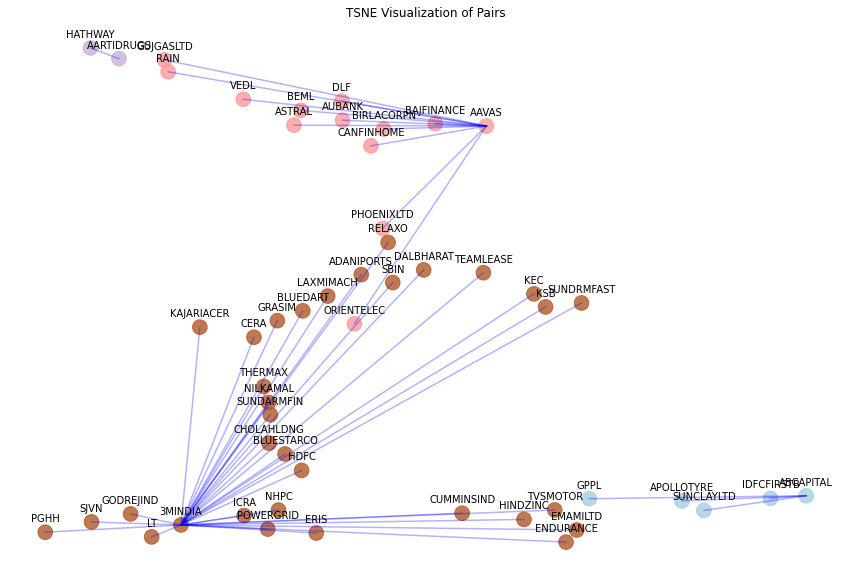

In [46]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='b');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()